## **🤖 Supervised Learning - Classification Models**

We now move to the **modeling stage** where we train and evaluate different supervised learning algorithms for heart disease prediction.  

- The dataset will be split into **training (80%)** and **testing (20%)** subsets.  
- Models to be trained: **Logistic Regression, Decision Tree, Random Forest, and Support Vector Machine (SVM)**.  
- Evaluation will be based on **Accuracy, Precision, Recall, F1-score**, and **ROC/AUC** to compare model performance.  

This step helps us identify which model performs best and is most suitable for the final prediction task.  


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

## **🛠️ Preparing Datasets for Modeling**

Here we prepare different **feature sets** to test during model training:  

- **Full dataset (`X_full`)**: all processed features.  
- **RFE-selected dataset (`X_rfe`)**: only the top features chosen by Recursive Feature Elimination.  
- **PCA-transformed dataset (`X_pca`)**: reduced feature set retaining 95% of the variance.  
- **Target (`y`)**: labels loaded from the processed file.  

This allows us to compare how different feature selection/reduction strategies impact model performance.  


In [ ]:
X_full = pd.read_csv("../data/processed/processed_X.csv")  
y = pd.read_csv("../data/processed/y_pca_95.csv").values.ravel()

rfe_results = pd.read_csv("../data/processed/rfe_selected_features.csv")
selected_features = rfe_results[rfe_results["Selected"]==True]["Feature"].tolist()
selected_feature_names = [X_full.columns[i] for i in selected_features]
X_rfe = X_full[selected_feature_names]

X_pca = pd.read_csv("../data/processed/X_pca_95.csv")  

## **🔹 Logistic Regression - All Features**
We trained Logistic Regression on the **full feature set** (all processed variables).

### What we did:
- Split the dataset (80/20 train-test).  
- Trained Logistic Regression with all available features (~30).  

### What we found:
- **Accuracy**: ~85.2%  
- Class 0: Precision = 0.90, Recall = 0.82  
- Class 1: Precision = 0.81, Recall = 0.89  

### Analysis:
- Model performs reasonably well with **balanced precision and recall**.  
- Good recall for **disease class (1)** → strong ability to detect patients with heart disease.  
- However, using all features might introduce noise or redundancy.  


In [ ]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_full = LogisticRegression(max_iter=1000)
log_reg_full.fit(X_train_full, y_train_full)

y_pred_full = log_reg_full.predict(X_test_full)
print("🔹 Logistic Regression - All Features")
print("Accuracy:", accuracy_score(y_test_full, y_pred_full))
print(classification_report(y_test_full, y_pred_full))

🔹 Logistic Regression - All Features
Accuracy: 0.8524590163934426
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        33
           1       0.81      0.89      0.85        28

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



## **🔹 Logistic Regression - RFE**
We applied **Recursive Feature Elimination (RFE)** to choose the top 10 most relevant predictors.

### What we did:
- Selected ~10 features via RFE.  
- Trained Logistic Regression only on those selected predictors.  

### What we found:
- **Accuracy**: ~86.9%  
- Class 0: Precision = 0.90, Recall = 0.85  
- Class 1: Precision = 0.83, Recall = 0.89  

### Analysis:
- Accuracy improved slightly compared to the full feature model (~85% → ~87%).  
- Model is **simpler and more efficient**, with no major drop in performance.  
- Suggests that **feature selection helps remove irrelevant features** and may boost generalization.  


In [ ]:
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_rfe, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_rfe = LogisticRegression(max_iter=1000)
log_reg_rfe.fit(X_train_rfe, y_train_rfe)

y_pred_rfe = log_reg_rfe.predict(X_test_rfe)
print("🔹 Logistic Regression - Selected Features (~10)")
print("Accuracy:", accuracy_score(y_test_rfe, y_pred_rfe))
print(classification_report(y_test_rfe, y_pred_rfe))

🔹 Logistic Regression - Selected Features (~10)
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.83      0.89      0.86        28

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



## **🔹 Logistic Regression - PCA**
We used **PCA** to reduce dimensionality, keeping 95% variance (12 components).

### What we did:
- Transformed original features into 12 PCA components.  
- Trained Logistic Regression on the transformed dataset.  

### What we found:
- **Accuracy**: ~88.5%  
- Class 0: Precision = 0.91, Recall = 0.88  
- Class 1: Precision = 0.86, Recall = 0.89  

### Analysis:
- PCA achieved the **best accuracy** among the three setups.  
- Performance is balanced across both classes.  
- Downsides: PCA features are **not directly interpretable**, unlike original/RFE-selected features.  
- Shows that PCA effectively reduces dimensionality while improving prediction.  


In [ ]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

log_reg_pca = LogisticRegression(max_iter=1000)
log_reg_pca.fit(X_train_pca, y_train_pca)

y_pred_pca = log_reg_pca.predict(X_test_pca)
print("🔹 Logistic Regression - PCA Features")
print("Accuracy:", accuracy_score(y_test_pca, y_pred_pca))
print(classification_report(y_test_pca, y_pred_pca))

🔹 Logistic Regression - PCA Features
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.91      0.88      0.89        33
           1       0.86      0.89      0.88        28

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



## **📊 ROC Curve & AUC – Logistic Regression (PCA)**

We evaluated the PCA-based Logistic Regression model using the **ROC curve** and **AUC score**.  

### What we found:
- **AUC Score**: 0.952 → Excellent performance.  
- The ROC curve shows the model achieves a very good balance between **True Positive Rate (sensitivity)** and **False Positive Rate (1 - specificity)**.  
- AUC close to 1.0 indicates the classifier is highly capable of distinguishing between patients with and without heart disease.  

### Analysis:
- This reinforces the earlier accuracy/F1 results, confirming that PCA features helped the model achieve **strong predictive power**.  
- Compared to accuracy alone, AUC gives a more robust view of performance across different thresholds.  


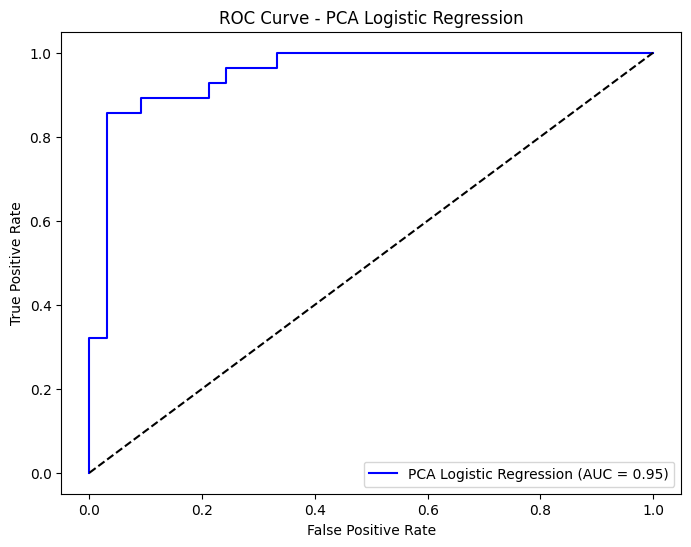

AUC Score (PCA Logistic Regression): 0.952


In [10]:
y_prob_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]
fpr, tpr, _ = roc_curve(y_test_pca, y_prob_pca)
auc_score = roc_auc_score(y_test_pca, y_prob_pca)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f"PCA Logistic Regression (AUC = {auc_score:.2f})", color="blue")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - PCA Logistic Regression")
plt.legend()
plt.show()

print(f"AUC Score (PCA Logistic Regression): {auc_score:.3f}")